In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir(r'D:\Datasets')

In [2]:
data = pd.read_csv('pokemon.csv')

In [3]:
data.head()

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary
0,292,Shedinja,Bug,Ghost,708,25,130,171,173,96,113,3,False
1,50,Diglett,Ground,NaN,1006,254,155,237,129,218,13,1,False
2,129,Magikarp,Water,NaN,811,164,201,28,92,147,179,1,False
3,172,Pichu,Electric,NaN,972,1,90,232,191,224,234,2,False
4,213,Shuckle,Bug,Rock,467,29,130,29,67,51,161,2,False


In [4]:
data.isnull().sum()

#               0
Name            0
Type_1          0
Type_2        386
Total           0
HP              0
Attack          0
Defense         0
Sp.Atk          0
Sp.Def          0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [5]:
data.shape

(800, 13)

In [6]:
# filling null values with NA
data.fillna('NA',inplace=True)

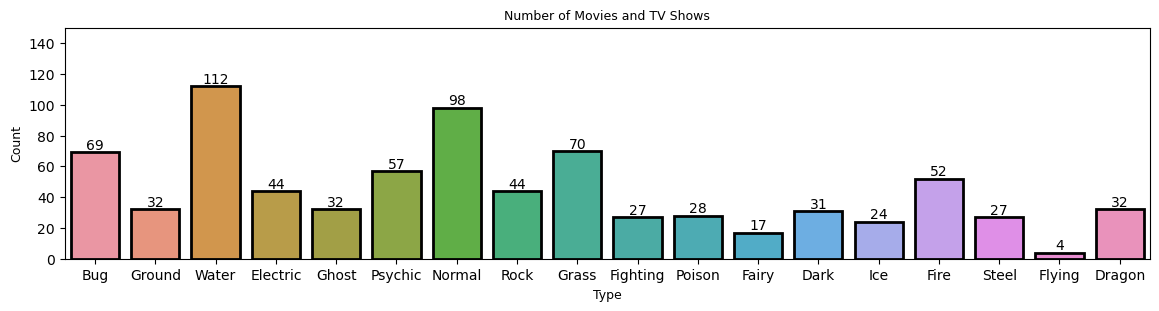

In [7]:
# Number of pokemon with each Type 1
fig,ax = plt.subplots(figsize=(14,3))
sns.countplot(data=data,x='Type_1',ec='k',lw=2,ax=ax)
ax.bar_label(ax.containers[0])
plt.ylim(0,150)
plt.xlabel('Type',fontsize=9)
plt.ylabel('Count',fontsize=9)
plt.title('Number of Movies and TV Shows',fontsize=9)
plt.show()

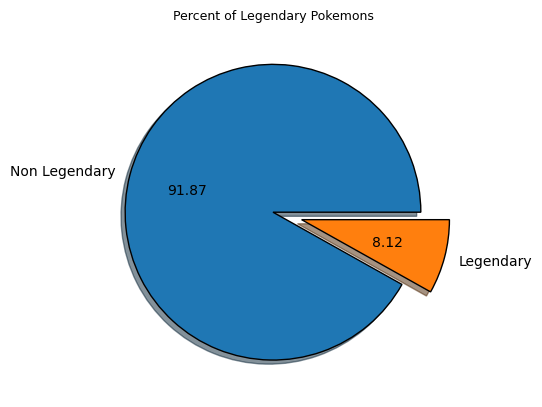

In [8]:
# Percent of Legendary Pokemon in this dataset
data['Legendary'].value_counts().plot(kind='pie',\
        normalize=True,explode=[0,.2],labels = ['Non Legendary','Legendary'],autopct='%.2f',shadow=True,wedgeprops={'ec':'k'})
plt.ylabel('')
plt.title('Percent of Legendary Pokemons',fontsize=9)
plt.show()

In [9]:
# Top 10 pokemons with Highest speed score
data.sort_values(by='Speed',ascending=False)[['Name','Type_1','Speed']][:10]

,Name,Type_1,Speed
589,Regirock,Rock,255
527,Zebstrika,Electric,255
148,Metapod,Bug,254
392,Lopunny,Normal,254
530,Sawk,Fighting,253
670,Heatran,Fire,253
332,Deerling,Normal,253
65,Natu,Psychic,252
546,Druddigon,Dragon,252
68,Lotad,Water,252


In [10]:
# Top 10 pokemons with Attack score
data.sort_values(by='Attack',ascending=False)[['Name','Type_1','Attack']][:10]

,Name,Type_1,Attack
630,Diggersby,Normal,255
322,Snover,Grass,255
344,Ducklett,Water,255
244,Oshawott,Water,255
343,Tranquill,Normal,255
80,Riolu,Fighting,254
465,Magnezone,Electric,254
796,Wailord,Water,254
524,Simisage,Grass,254
606,Volcanion,Fire,254


In [11]:
# strongest pokemon from each type
Type1 = list(data['Type_1'].unique())
print('Strongest Pokemon in each Type')
print('-'*20)
for i in Type1:
    print('Type:',i)
    print('Pokemon:',data[data['Type_1']==i].sort_values(by='Total',ascending=False)\
          [['Name']][:1].to_string(index=False,header=False))
    print('Score:',data[data['Type_1']==i].sort_values(by='Total',ascending=False)\
          [['Total']][:1].to_string(index=False,header=False))
    print('-'*20)

Strongest Pokemon in each Type
--------------------
Type: Bug
Pokemon: Silcoon
Score: 1165
--------------------
Type: Ground
Pokemon: Donphan
Score: 1165
--------------------
Type: Water
Pokemon: Ducklett
Score: 1294
--------------------
Type: Electric
Pokemon: Manectric
Score: 1049
--------------------
Type: Ghost
Pokemon: Gastly
Score: 1061
--------------------
Type: Psychic
Pokemon: Gallade
Score: 1138
--------------------
Type: Normal
Pokemon: Bibarel
Score: 1144
--------------------
Type: Rock
Pokemon: Roggenrola
Score: 1191
--------------------
Type: Grass
Pokemon: Bayleef
Score: 1174
--------------------
Type: Fighting
Pokemon: Machoke
Score: 1118
--------------------
Type: Poison
Pokemon: Garbodor
Score: 1127
--------------------
Type: Fairy
Pokemon: Spritzee
Score: 1032
--------------------
Type: Dark
Pokemon: Absol
Score: 1055
--------------------
Type: Ice
Pokemon: Sealeo
Score: 1088
--------------------
Type: Fire
Pokemon: CharizardMega Charizard Y
Score: 1225
-------------

In [12]:
# weakest pokemon from each type
print('Weakest Pokemon in each Type')
print('-'*20)
for i in Type1:
    print('Type:',i)
    print('Pokemon:',data[data['Type_1']==i].sort_values(by='Total',ascending=True)\
          [['Name']][:1].to_string(index=False,header=False))
    print('Score:',data[data['Type_1']==i].sort_values(by='Total',ascending=True)\
          [['Total']][:1].to_string(index=False,header=False))
    print('-'*20)

Weakest Pokemon in each Type
--------------------
Type: Bug
Pokemon: Spewpa
Score: 255
--------------------
Type: Ground
Pokemon: Claydol
Score: 476
--------------------
Type: Water
Pokemon: Piplup
Score: 251
--------------------
Type: Electric
Pokemon: Electabuzz
Score: 293
--------------------
Type: Ghost
Pokemon: PumpkabooSmall Size
Score: 376
--------------------
Type: Psychic
Pokemon: MewtwoMega Mewtwo Y
Score: 240
--------------------
Type: Normal
Pokemon: Slakoth
Score: 389
--------------------
Type: Rock
Pokemon: Barbaracle
Score: 314
--------------------
Type: Grass
Pokemon: Nuzleaf
Score: 229
--------------------
Type: Fighting
Pokemon: MedichamMega Medicham
Score: 444
--------------------
Type: Poison
Pokemon: Trubbish
Score: 323
--------------------
Type: Fairy
Pokemon: Floette
Score: 480
--------------------
Type: Dark
Pokemon: Liepard
Score: 449
--------------------
Type: Ice
Pokemon: GlalieMega Glalie
Score: 335
--------------------
Type: Fire
Pokemon: BlazikenMega Blazi

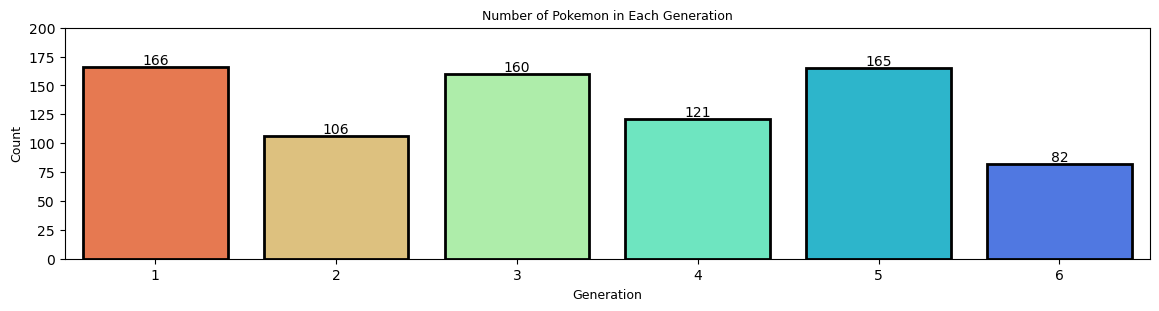

In [13]:
# Number of pokemon from each Generation
fig,ax = plt.subplots(figsize=(14,3))
sns.countplot(data=data,x='Generation',ec='k',lw=2,ax=ax,palette='rainbow_r')
ax.bar_label(ax.containers[0])
plt.ylim(0,200)
plt.xlabel('Generation',fontsize=9)
plt.ylabel('Count',fontsize=9)
plt.title('Number of Pokemon in Each Generation',fontsize=9)
plt.show()

In [14]:
# Find Details of Pikachu,Charizard,Bulbasaur
data[data['Name'].str.contains('pikachu',case=False)]

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary
26,25,Pikachu,Electric,NA,399,34,99,11,2,234,19,1,False


In [15]:
data[data['Name'].str.contains('charizard',case=False)]

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary
548,6,Charizard,Fire,Flying,973,84,228,89,226,191,155,1,False
549,6,CharizardMega Charizard X,Fire,Dragon,1150,237,219,236,187,246,25,1,False
550,6,CharizardMega Charizard Y,Fire,Flying,1225,194,244,207,156,184,240,1,False


In [16]:
data[data['Name'].str.contains('Bulbasaur',case=False)]

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary
102,1,Bulbasaur,Grass,Poison,610,43,218,134,27,52,136,1,False


In [17]:
# Which pokemon can defense the best in Fire Type
data[data['Type_1']=='Fire'].sort_values(by='Defense',ascending=False)[['Name','Defense']][:1]

,Name,Defense
396,Tepig,255


In [18]:
# Strongest pokemon from each generation
Generation = list(data['Generation'].unique())
print('Strongest Pokemon')
print('-'*10)
for i in Generation:
    print('Generation:',i)
    print('Pokemon:',data[data['Generation']==i].sort_values(by='Total',ascending=False)\
         ['Name'][:1].to_string(index=False,header=False))
    print('Speed:',data[data['Generation']==i].sort_values(by='Total',ascending=False)\
         ['Speed'][:1].to_string(index=False,header=False))
    print('Attack:',data[data['Generation']==i].sort_values(by='Total',ascending=False)\
         ['Attack'][:1].to_string(index=False,header=False))
    print('HP:',data[data['Generation']==i].sort_values(by='Total',ascending=False)\
         ['HP'][:1].to_string(index=False,header=False))
    print('-'*10)

Strongest Pokemon
----------
Generation: 3
Pokemon: Relicanth
Speed: 229
Attack: 221
HP: 231
----------
Generation: 1
Pokemon: CharizardMega Charizard Y
Speed: 240
Attack: 244
HP: 194
----------
Generation: 2
Pokemon: Quagsire
Speed: 230
Attack: 129
HP: 251
----------
Generation: 4
Pokemon: Manaphy
Speed: 187
Attack: 141
HP: 213
----------
Generation: 5
Pokemon: Ducklett
Speed: 238
Attack: 255
HP: 245
----------
Generation: 6
Pokemon: Quilladin
Speed: 157
Attack: 154
HP: 237
----------
